## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Дмитрий Монахов

### Общая информация

__Дата выдачи:__ 05.03.2020

__Дедлайн:__ 19.03.2020 23:59

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 18, а максимальное число дополнительных баллов, которые пойдут в бонус — 2. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [24]:
import numpy as np

In [25]:
def euclidian_metric(X, x):
    distances = np.sqrt(np.sum((X - x) ** 2, axis=1))
    return distances

def manhattan_metric(X, x):
    distances = np.sum(abs(X - x), axis=1)
    return distances

In [26]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [27]:
def prediction(obj, method, k, X, y, weights=False):
    dist = sorted(enumerate(method(X, obj)), key=lambda x:x[1])[:k]
    neigh = np.array([y[i[0]] for i in dist])
    if weights:
        weights = np.array([1 / i for i in dist])
    else:
        weights = np.ones(k)
    return sum(weights * neigh) / sum(weights)

In [28]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """
        self.X_train = X_train 
        self.y_train = y_train

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        if self.metric == 'euclid':
            metric = euclidian_metric
        elif self.metric == 'manhattan':
            metric = manhattan_metric
 
        def prediction(obj, metric=metric, k=self.k, X=self.X_train, y=self.y_train, weights=self.weights):
            dist = sorted(enumerate(metric(X, obj)), key=lambda x:x[1])[:k]
            neigh = np.array([y[i[0]] for i in dist])
            if weights == 'distance':
                weights = np.array([1 / i[1] for i in dist])
            elif weights == 'uniform':
                weights = np.ones(k)
            return sum(weights * neigh) / sum(weights)
            
        y_pred = np.array(list(map(prediction, X_test)))

        return y_pred

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [29]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
sklearn = KNeighborsRegressor(weights='distance')
sklearn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [32]:
unique = KNN(weights='distance')
unique.fit(X_train, y_train)

In [33]:
%%time
sk_pred = sklearn.predict(X_test)

Wall time: 48.9 ms


In [34]:
%%time
un_pred = unique.predict(X_test)

Wall time: 352 ms


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(sk_pred, y_test)

1.2511100369876107

In [37]:
mean_squared_error(un_pred, y_test)

1.2511100369876107

# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [39]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    y_pr = np.dot(x, w)
    if abs(y - y_pr) <= delta:
        return 0.5 * (y - y_pr) ** 2
    return delta * abs(y - y_pr) - 0.5 * delta ** 2


def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    y_pr = np.dot(x, w)
    if abs(y - y_pr) <= delta:
        return -(y - y_pr) * x
    if y > y_pr:
        return -delta * x
    return delta * x


In [40]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [41]:
y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [42]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """
        self.w = np.zeros(X_train.shape[1])
        self.loss_history = [np.mean(list(map(lambda x,y: huber_loss(x, y, self.w, delta=1), X_train, y_train)))]
        
        for i in range(1, self.max_iter + 1):
            gr = np.mean(list(map(lambda x,y: huber_grad(x, y, self.w, delta=self.delta), X_train, y_train)), axis=0)
            self.w = self.w - self.eta * gr
            self.loss_history.append(np.mean(list(map(lambda x,y: huber_loss(x, y, self.w, delta=self.delta), X_train, y_train))))
            if np.linalg.norm(gr) <= lrh.tol:
                break
        
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = np.array(list(map(lambda x:np.dot(self.w, x), X)))

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

        grad = np.mean(list(map(lambda x,y: huber_grad(x, y, self.w, delta=self.delta), X, y)), axis=0)
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """

        loss = np.mean(list(map(lambda x,y:huber_loss(x, y, self.w, delta=self.delta), X, y)))
        
        return loss
    
    def mse(self, X, y):
        
        loss = np.mean(list(map(lambda x,y:(np.dot(x,self.w) - y) ** 2, X, y)))
        
        return loss

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

In [43]:
lrh = LinearRegressionHuber()
loss_history = lrh.fit(X_train, y_train)

In [44]:
lrh.calc_loss(X_test, y_test)

0.4827342823832489

In [45]:
mean_squared_error(lrh.predict(X_test), y_test)

1.162473921866465

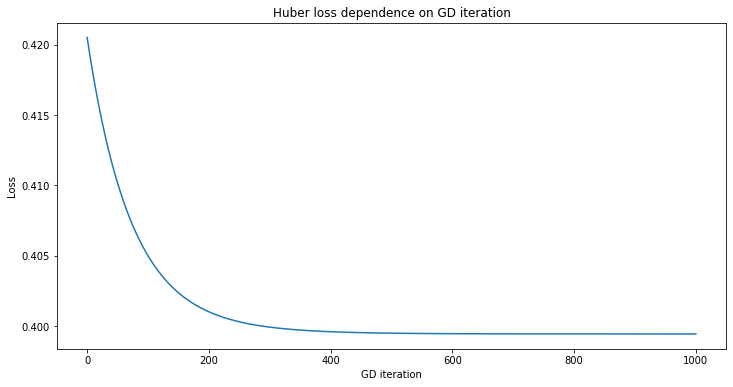

In [46]:
fig = plt.figure(figsize=(12,6))
plt.plot(loss_history)
plt.title('Huber loss dependence on GD iteration')
plt.ylabel('Loss')
plt.xlabel("GD iteration")
plt.show()

# Практика (8 + 0.5*)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder

%matplotlib inline

In [48]:
df = pd.read_csv('train.csv', header=0)

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [49]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [52]:
nas = pd.DataFrame([[i, sum(df[i].isna()), sum(df[i].isna())/ len(df)] for i in df.columns[df.isna().any()]], 
                   columns=['Column', 'Number', 'Share'])
nas

,Column,Number,Share
0,LotFrontage,259,0.177397
1,Alley,1369,0.937671
2,MasVnrType,8,0.005479
3,MasVnrArea,8,0.005479
4,BsmtQual,37,0.025342
5,BsmtCond,37,0.025342
6,BsmtExposure,38,0.026027
7,BsmtFinType1,37,0.025342
8,BsmtFinType2,38,0.026027
9,Electrical,1,0.000685


В 19 столбцах есть пропуски. Есть столбцы как с маленькой, так и большой долей пропусков. При этом многие столбцы с пропусками (например, GarageType, GarageYrBilt или PoolQC) описывают качественную характеристику элемента дома(гаража, бассейна, забора). Кажется, в этих столбцах NaN обозначает не потерянное значение, а отсутствие этого элемента в доме (так, во всех признаках, описывающих гараж, одинаковое количество пропусков => в этих домах просто нет гаража).
Подтверждение этого предположения есть в описании датасета.

Единственным столбцом, в котором пропуски не объясняются так, является LotFrontage

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [53]:
for i in nas['Column'].unique():
    if 0 in df[i].unique():
        print(i)

MasVnrArea


In [54]:
for i in nas['Column'].unique():
    if 'None' in df[i].unique() or 'No' in df[i].unique():
        print(i)

MasVnrType
BsmtExposure


C:\Users\79151\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [55]:
df[df['MasVnrArea'].isna()]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

В столбце MasVnrArea уже есть значение 0, а в столбе MasVnrType значение None, то есть в этих столбцах nan тоже может обозначать не отсутствие MasVnr, а потерянные данные. Но nan в этих столбцах составляют всего 0,5% от данных, поэтому заполним столбец MasVnrType самым популярным значением,а MasVnrArea медианой по этому типу. 

In [56]:
df['MasVnrArea'].fillna(np.median(df[df['MasVnrType'] == df['MasVnrType'].describe()['top']]['MasVnrArea']), inplace=True)

In [57]:
df['MasVnrType'].fillna(df['MasVnrType'].describe()['top'], inplace=True)

У 3 признаков из группы признаков, описывающих подвал, 37 пропусков, при этом у 2 признаков - 38. Можно предположить, что в 37 домах правда нет подвалов, но по одному пропуску в двух столбцах этим не объясняются. Для "лишнего" пропуска в столбце BsmtFinType2 видим, что значение BsmtFinSF2, равное площади второго типа, не равно 0, в отличие от значения для "обычных" пропусков, поэтому его заполняем самым популярным значением. То же самое сделаем для "лишнего" пропуска в BsmtExposure.

In [58]:
df[df['BsmtFinType2'].isna()]['BsmtFinSF2']

17        0
39        0
90        0
102       0
156       0
182       0
259       0
332     479
342       0
362       0
371       0
392       0
520       0
532       0
533       0
553       0
646       0
705       0
736       0
749       0
778       0
868       0
894       0
897       0
984       0
1000      0
1011      0
1035      0
1045      0
1048      0
1049      0
1090      0
1179      0
1216      0
1218      0
1232      0
1321      0
1412      0
Name: BsmtFinSF2, dtype: int64

In [59]:
df['BsmtFinType2'][332] = df['BsmtFinType2'].describe()['top']

C:\Users\79151\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df[(df['BsmtExposure'].isna()) & (df['BsmtFinType1'].notna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [61]:
df['BsmtExposure'][948] = df['BsmtExposure'].describe()['top']

C:\Users\79151\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Заполним признаки, в которых NaN говорит об отсутсвии описываемого ими элемента.

In [62]:
for i in df.columns[df.isna().any()].drop('LotFrontage'):
    df[i].fillna(0, inplace=True)

С признаком LotFrontage так не получится, так как он обозначает длину дома, измеренную по линии соприкосновения с дорогой, и не может быть равен 0. Следовательно, nan обозначает не 0, а потерянное значение. Так как пропущенных значений достаточно много(почти 18%), заполнять средним или медианой не очень хочется. Представим, что этот признак распределен дискретно, сделаем для него "таблицу распределения" и заполним пропущенные значения из нее чтобы сохранить распределение признака.

In [63]:
prob = (df['LotFrontage'].value_counts().sort_index() / df['LotFrontage'].value_counts().sum()).values
weight = (df['LotFrontage'].value_counts().sort_index() / df['LotFrontage'].value_counts().sum()).index

In [64]:
np.random.seed(12)
a = np.random.choice(weight, size=259, p=prob)

In [65]:
b = df[df['LotFrontage'].isnull() == True].index
fill = dict(zip(b,a))
df['LotFrontage'].fillna(value=fill, inplace=True)

Этот способ может быть не лучшим, так как 18% достаточно много, чтобы значительно повлиять на распределение признака и, возможно, распределение, полученное сейчас, не верно. Однако перед тем как пытаться придумать способ лучше, надо посмотреть на вес признака в модели и понять, нужно ли это.

In [66]:
df.isna().any().any()

False

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Всего в датасете 43 категориальных признака. При этом, некоторые из них имеет смысл рассматривать как порядковые - например, KitchenQual и все остальные со словом Quality или Cond в названии. Поэтому эти признаки будут кодироваться через label encoding,экономя количество колонок и, возможно, давая полезные результаты своей порядковостью. Остальные признаки будут кодироваться с помощью one-hot-encoding.

In [67]:
por = []
for i in df.columns[df.dtypes == 'object'].drop('Condition1'):
    if 'Condition' not in i and ('Qual' in i or 'QC' in i or 'Cond' in i or 'Qu' in i):
        print(df[i].unique(), i)
        por.append(i)

['Gd' 'TA' 'Ex' 'Fa'] ExterQual
['TA' 'Gd' 'Fa' 'Po' 'Ex'] ExterCond
['Gd' 'TA' 'Ex' 0 'Fa'] BsmtQual
['TA' 'Gd' 0 'Fa' 'Po'] BsmtCond
['Ex' 'Gd' 'TA' 'Fa' 'Po'] HeatingQC
['Gd' 'TA' 'Ex' 'Fa'] KitchenQual
[0 'TA' 'Gd' 'Fa' 'Ex' 'Po'] FireplaceQu
['TA' 'Fa' 'Gd' 0 'Ex' 'Po'] GarageQual
['TA' 'Fa' 0 'Gd' 'Po' 'Ex'] GarageCond
[0 'Ex' 'Fa' 'Gd'] PoolQC


In [68]:
dic = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0}

In [69]:
def encode(x, dic=dic):
    return dic[x]

In [70]:
for i in por:
    df[i] = df[i].apply(encode)

In [71]:
df = pd.get_dummies(df, drop_first=True)

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [72]:
cor = pd.DataFrame(np.corrcoef(df.iloc[:, :47], rowvar=False), index=df.iloc[:, :47].columns,  columns=df.iloc[:,:47].columns)

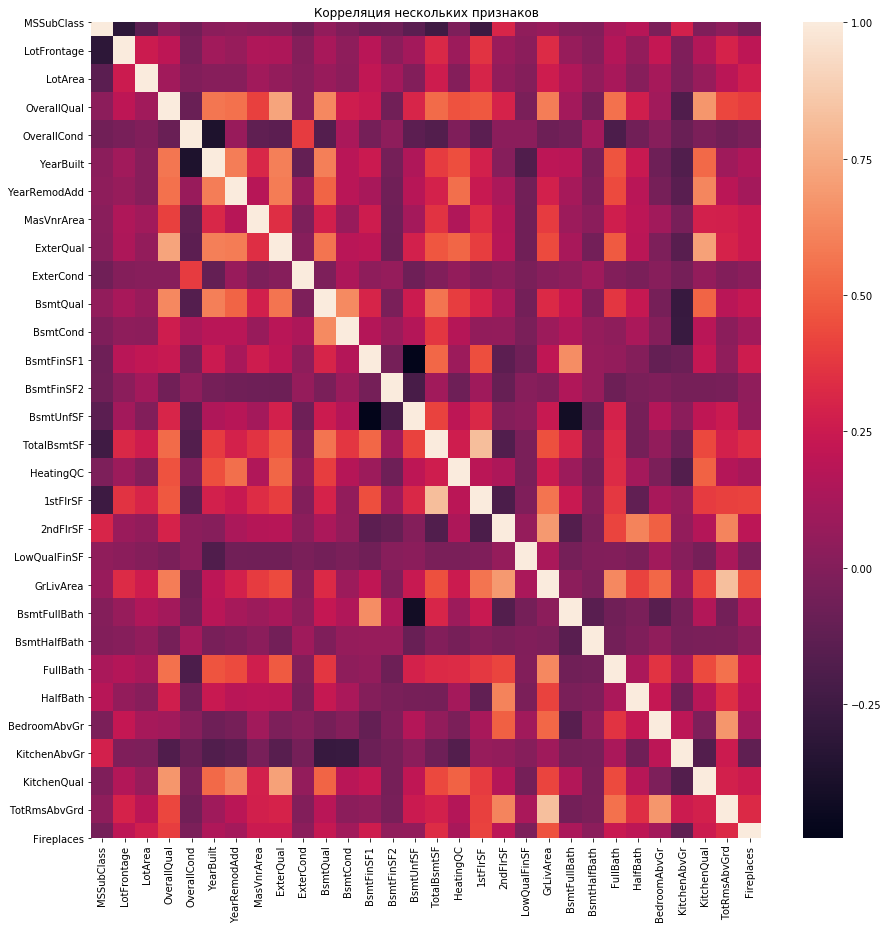

In [73]:
f = plt.figure(figsize=(15,15))
sns.heatmap(cor.iloc[:30, :30])
plt.title('Корреляция нескольких признаков')
plt.show()

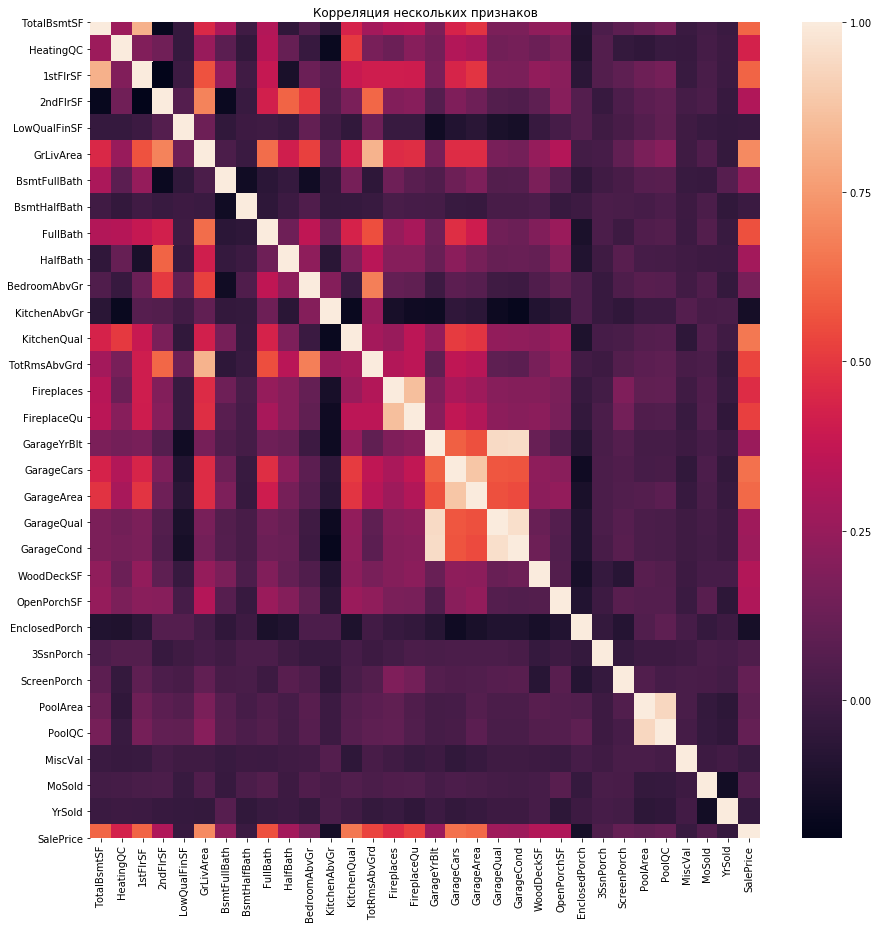

In [74]:
f = plt.figure(figsize=(15,15))
sns.heatmap(cor.iloc[15:47, 15:47])
plt.title('Корреляция нескольких признаков')
plt.show()

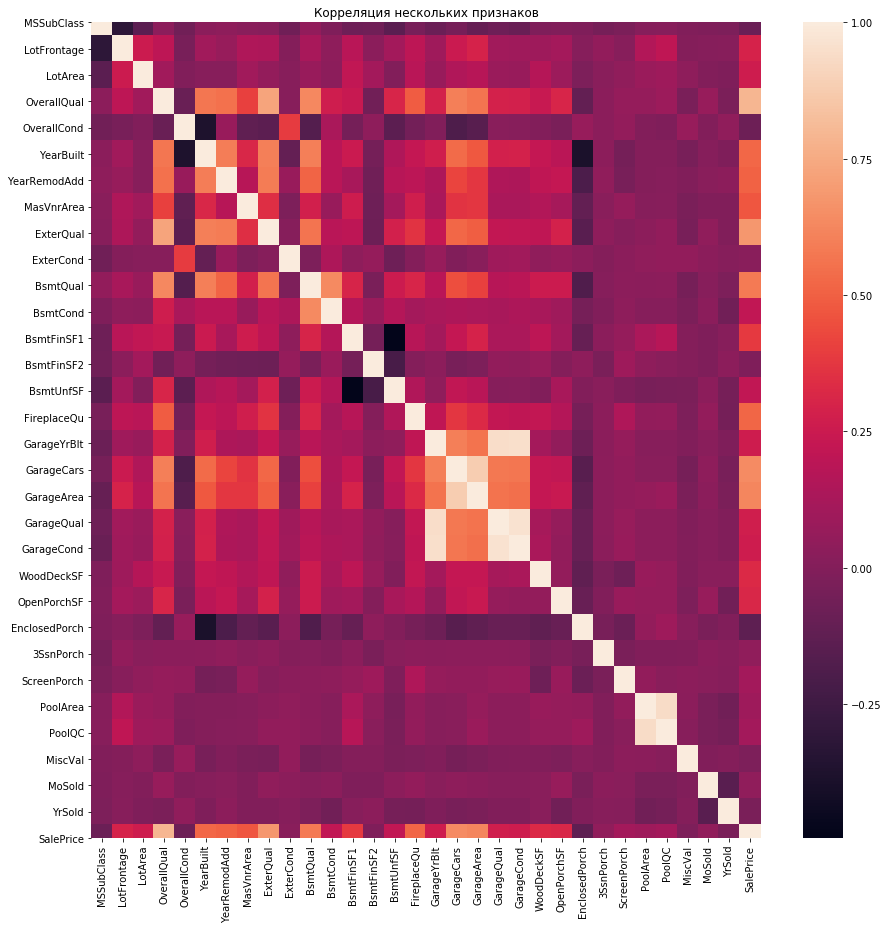

In [75]:
f = plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([pd.concat([cor.iloc[:,:15], cor.iloc[:,30:47]], axis=1)[:15],
          pd.concat([cor.iloc[:,:15], cor.iloc[:,30:47]], axis=1)[30:47]]))
plt.title('Корреляция нескольких признаков')
plt.show()

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [76]:
np.max(cor['SalePrice'])

1.0

In [77]:
cor[cor['SalePrice'] == np.max(cor['SalePrice'])].index

Index(['SalePrice'], dtype='object')

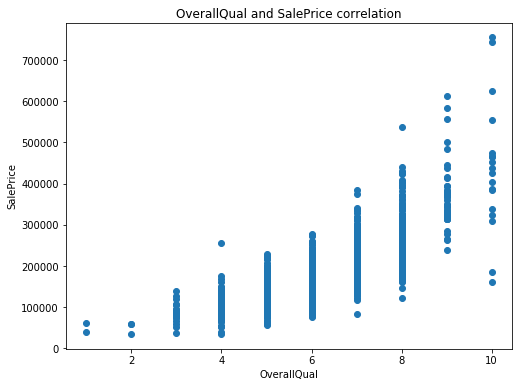

In [78]:
f = plt.figure(figsize=(8, 6)) 
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual and SalePrice correlation')
plt.show()

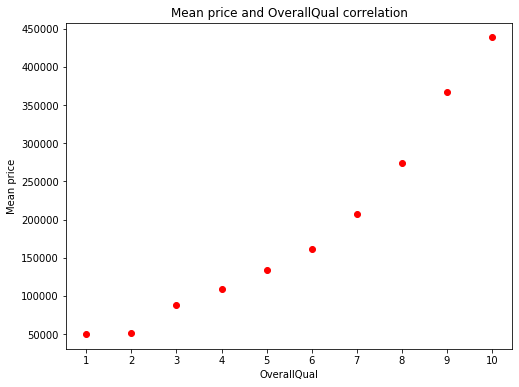

In [79]:
f = plt.figure(figsize=(8, 6)) 
for i in df['OverallQual'].unique():
    plt.plot(i, np.mean(df[df['OverallQual'] == i]['SalePrice']), 'or', label=i)
plt.xticks(ticks=range(1,11))
plt.xlabel('OverallQual')
plt.ylabel('Mean price')
plt.title('Mean price and OverallQual correlation')
plt.show()

In [80]:
min(cor['SalePrice'])

-0.13590737084214113

In [81]:
cor[cor['SalePrice'] == np.min(cor['SalePrice'])].index

Index(['KitchenAbvGr'], dtype='object')

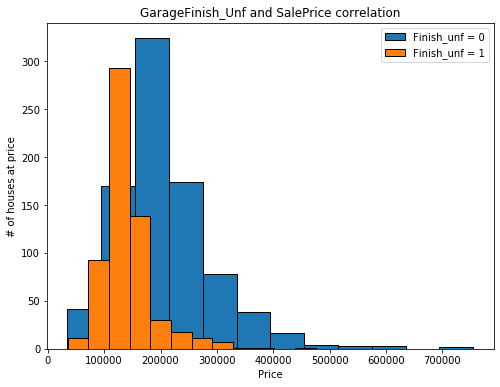

In [82]:
f = plt.figure(figsize=(8, 6)) 
plt.hist(df[df['GarageFinish_Unf'] == 0]['SalePrice'], ec='black', bins=12, label='Finish_unf = 0')
plt.hist(df[df['GarageFinish_Unf'] == 1]['SalePrice'], ec='black', bins=12, label='Finish_unf = 1')
plt.xlabel('Price')
plt.ylabel('# of houses at price')
plt.title('GarageFinish_Unf and SalePrice correlation')
plt.legend()
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

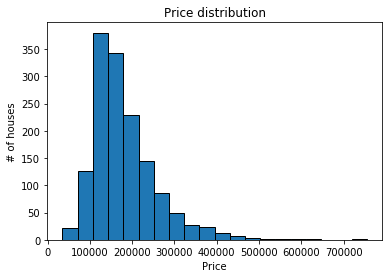

In [83]:
plt.hist(df['SalePrice'], ec='black', bins=20)
plt.xlabel('Price')
plt.ylabel('# of houses')
plt.title('Price distribution')
plt.show()

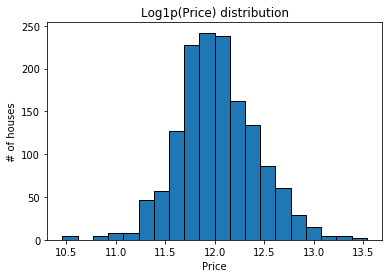

In [84]:
plt.hist(np.log1p(df['SalePrice']), ec='black', bins=20)
plt.xlabel('Price')
plt.ylabel('# of houses')
plt.title('Log1p(Price) distribution')
plt.show()

Наблюдения: распределение правда больше похоже на нормальное, порядок значений переменной сильно уменьшился, при этом отклонения в большую и меньшую сторону от медианы уравнялись.

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [85]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop('SalePrice', axis=1),
    np.log1p(df['SalePrice']),
    random_state=13
)

In [86]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 230), (365, 230), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [89]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

#### KNN

In [90]:
searchknn = GridSearchCV(KNeighborsRegressor(), scoring=scorer, 
                param_grid={'n_neighbors': range(1, 876, 2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
                         n_jobs=-1, cv=5)

In [91]:
%%time
searchknn.fit(X_train, y_train)

Wall time: 12min 28s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 876, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [92]:
searchknn.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [93]:
np.sqrt(mean_squared_error(searchknn.predict(X_val), y_val))

0.22599028454168865

#### Regression

In [94]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
np.sqrt(mean_squared_error(regr.predict(X_val), y_val))

0.2159447742810462

In [96]:
regrh = HuberRegressor()
regrh.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [97]:
np.sqrt(mean_squared_error(regrh.predict(X_val), y_val))

0.2834573266550455

#### Lasso

Экспериментально было выяснено, что веса alpha больше 0.001 работают хуже, чем alpha=0.001, поэтому на этом этапе поиск ведется только для alpha<=0.001.

In [98]:
searchlasso = GridSearchCV(Lasso(), scoring=scorer, 
                param_grid={'alpha': np.linspace(0.0001, 0.001, 1000)},
                         n_jobs=-1, cv=5)

In [99]:
searchlasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.0001    , 0.0001009 , 0.0001018 , 0.0001027 , 0.0001036 ,
       0.0001045 , 0.00010541...
       0.00097838, 0.00097928, 0.00098018, 0.00098108, 0.00098198,
       0.00098288, 0.00098378, 0.00098468, 0.00098559, 0.00098649,
       0.00098739, 0.00098829, 0.00098919, 0.00099009, 0.00099099,
       0.00099189, 0.00099279, 0.00099369, 0.00099459, 0.0009955 ,
       0.0009964 , 0.0009973 , 0.0009982 , 0.0009991 , 0.001     ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_bett

In [100]:
searchlasso.best_params_

{'alpha': 0.00037837837837837834}

In [101]:
np.sqrt(mean_squared_error(searchlasso.predict(X_val), y_val))

0.21558290880127373

#### Ridge

In [102]:
searchridge = GridSearchCV(Ridge(), scoring=scorer, 
                param_grid={'alpha': np.linspace(0.1, 20, 1000)}, #значения меньше 0.1 были проверены отдельно
                         n_jobs=-1, cv=5)

In [103]:
searchridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([ 0.1       ,  0.11991992,  0.13983984,  0.15975976,  0.17967968,
        0.1995996 ,  0.21951952,  0.23943944,  0.25935936,  0.27927928,
        0.2991992 ,  0.31911912...
       19.62152152, 19.64144144, 19.66136136, 19.68128128, 19.7012012 ,
       19.72112112, 19.74104104, 19.76096096, 19.78088088, 19.8008008 ,
       19.82072072, 19.84064064, 19.86056056, 19.88048048, 19.9004004 ,
       19.92032032, 19.94024024, 19.96016016, 19.98008008, 20.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [104]:
searchridge.best_params_

{'alpha': 10.398598598598598}

In [105]:
np.sqrt(mean_squared_error(searchridge.predict(X_val), y_val))

0.2142262406995398

Лучший результат дает Ridge с параметром alpha = 10.4, его результат по метрике RMSE - 0.214

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [106]:
regr_weights = LinearRegression().fit(X_train, y_train).coef_
lasso_weights = Lasso(alpha=0.00037837837837837834).fit(X_train, y_train).coef_
ridge_weights = Ridge(alpha=10.398598598598598).fit(X_train, y_train).coef_

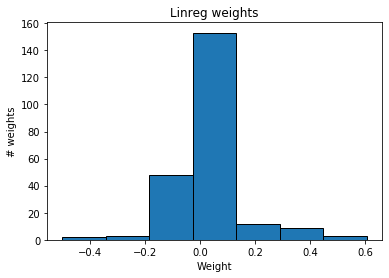

In [107]:
plt.hist(regr_weights, bins=7, ec='black')
plt.title('Linreg weights')
plt.xlabel('Weight')
plt.ylabel('# weights')
plt.show()

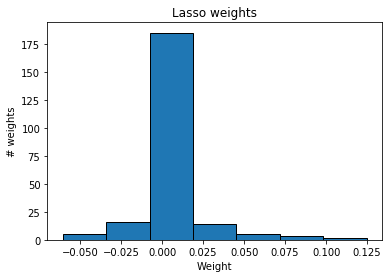

In [108]:
plt.hist(lasso_weights, bins=7, ec='black')
plt.title('Lasso weights')
plt.xlabel('Weight')
plt.ylabel('# weights')
plt.show()

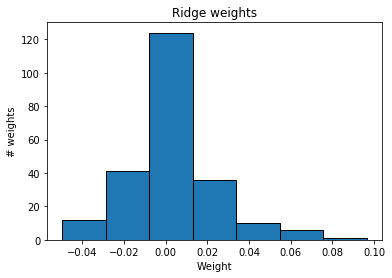

In [109]:
plt.hist(ridge_weights, bins=7, ec='black')
plt.title('Ridge weights')
plt.xlabel('Weight')
plt.ylabel('# weights')
plt.show()

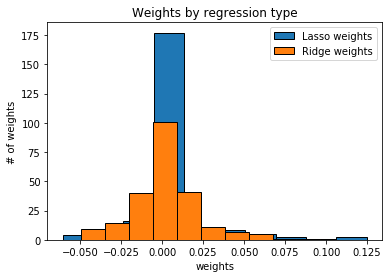

In [110]:
plt.hist(lasso_weights, bins=10, ec='black', label='Lasso weights')
plt.hist(ridge_weights, bins=10, ec='black', label='Ridge weights')
plt.title('Weights by regression type')
plt.legend()
plt.xlabel('weights')
plt.ylabel('# of weights')
plt.show()

В обычной регрессии разброс весов гораздо больше, чем в двух других моделях, так как в ней отстутсвует регуляризация. В Ridge разброс весов меньше, чем в Lasso, но количество весов, близких к нулю, тоже меньше. Ridge, использующий $||w||^2$, в функции ошибки штрафует за большие отклонения сильнее, чем Lasso, поэтому возникает такое распределение.

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

Попробуем убрать признаки, которые занулил Lasso и обучить модели на них

In [111]:
X_val1 = X_val[X_val.columns[lasso_weights != 0]]
X_train1 = X_train[X_train.columns[lasso_weights != 0]]

In [112]:
np.sqrt(mean_squared_error(Ridge(alpha=10.398598598598598).fit(X_train1, y_train).predict(X_val1), y_val))

0.2145444785558858

In [113]:
np.sqrt(mean_squared_error(KNeighborsRegressor(n_neighbors=7, p=1, weights='distance').fit(X_train1, y_train).predict(X_val1), y_val))

0.2258721217357876

Нормализуем признаки

In [114]:
minm = MinMaxScaler()

In [115]:
df1 = pd.DataFrame(data=minm.fit_transform(df.drop('SalePrice', axis=1)))
df1

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.666667,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.666667,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.333333,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,1.000000,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.333333,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [116]:
X_train1, X_val1, y_train, y_val = train_test_split(
    df1,
    np.log1p(df['SalePrice']),
    random_state=13
)

In [117]:
np.sqrt(mean_squared_error(Ridge(alpha=10.398598598598598).fit(X_train1, y_train).predict(X_val1), y_val))

0.1774924953127045

Итог: 0.177 при использовании *Ridge*

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

См. прошлый пункт

# Теория (1.5*)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Очевидно, $\rho_\tau(z) > 0$ всегда. 
$$\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C \right) = \sum\limits_{i=1}^\ell\rho_\tau y_i - \ell\rho_\tau C$$
Видим, что функция убывающая по С, при этом у нее нет экстремумов, поэтому для минимизации функции:$$C = +\infty$$

## 2* (0.5)

Алгоритм регрессии выдает константный ответ для любого объекта: $a(x) = C$. Найдите $C$, при котором средняя абсолютная ошибка на обучающей выборке $\{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ будет минимальной.

$$ MAE = \sum\limits_{i=1}^\ell|c - y_i| \to \min_C, $$
Производная одного элемента суммы:
$$ f'(C) = \begin{cases}
1, & C > y_i\\
-1, & C < y_i
\end{cases} $$
Тогда производная функции ошибки:
$$ F'(C) = \sum\limits_{i=1}^\ell(1 * I[C>y_i]) + (-1 * I[C<y_i]) $$
Функция минимальна, когда ее производная равна 0 (у MAE есть только один экстремум - минимум). Производная обращается в 0 при следующих С:
$$ $$
$$y_{\ell/2}< C < y_{\ell/2 + 1}, если \space\ell - четное$$
$$ $$
$$y_{\ell/2} = C, если  \space\ell - нечетное$$

## 3* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

$$\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right)\to\min_C,$$

*(your solution here)*